In [1]:
from Fun_to_prepare_data import * 
from sklearn.model_selection import train_test_split
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorboard.plugins.hparams import api as hp

In [2]:
paths={1:"../imputs/oranges_dataset/oranges_pictures/",
      0:"../imputs/oranges_dataset/random_pictures/"}
images={}
for clas,path in paths.items():
    images[clas]=[]
    for im in listdir(path):
        if im.endswith("jpg") or im.endswith("png"):
            a=resize_image(path+im,(64,64))
            images[clas].append(np.asarray(a))
    images[clas]=np.array(images[clas])

In [3]:
X= np.concatenate(list(images.values()),axis=0)

In [4]:
y = np.concatenate([[k]* v.shape[0] for k,v in images.items()])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
name = "Oranges_model_sigmoid_2-{}".format(int(time.time()))

In [7]:
Tensorboard =TensorBoard(log_dir="logs/{}".format(name)) 

In [8]:
img_width, img_height = 64, 64
img_rows, img_cols = 64, 64

# Prepare data to feed the NN
num_classes = 2

# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_width, img_height)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_width, img_height, 3)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
#X_train = tf.keras.utils.normalize(X_train,axis=3)
#X_test = tf.keras.utils.normalize(X_test,axis=3)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (952, 64, 64, 3)
952 train samples
238 test samples


In [9]:
img_width, img_height = 64, 64

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Flatten())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.add(Dense(2))
#model.add(Activation('relu'))




model.compile(loss='binary_crossentropy',
              #optimizer='rmsprop',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
batch_size = 20
epochs = 25

predictions = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1 ,
          validation_data=(X_test, y_test),
          callbacks=[Tensorboard])

Epoch 1/25
48/48 [==============================] - 5s 104ms/step - loss: 0.3902 - accuracy: 0.8382 - val_loss: 0.2487 - val_accuracy: 0.8992
Epoch 2/25
48/48 [==============================] - 4s 93ms/step - loss: 0.2862 - accuracy: 0.9065 - val_loss: 0.2339 - val_accuracy: 0.9286
Epoch 3/25
48/48 [==============================] - 4s 92ms/step - loss: 0.2644 - accuracy: 0.9118 - val_loss: 0.2272 - val_accuracy: 0.9370
Epoch 4/25
48/48 [==============================] - 5s 96ms/step - loss: 0.2319 - accuracy: 0.9233 - val_loss: 0.1953 - val_accuracy: 0.9496
Epoch 5/25
48/48 [==============================] - 4s 92ms/step - loss: 0.2314 - accuracy: 0.9359 - val_loss: 0.1525 - val_accuracy: 0.9412
Epoch 6/25
48/48 [==============================] - 5s 98ms/step - loss: 0.2122 - accuracy: 0.9275 - val_loss: 0.2041 - val_accuracy: 0.9538
Epoch 7/25
48/48 [==============================] - 6s 115ms/step - loss: 0.1802 - accuracy: 0.9454 - val_loss: 0.1562 - val_accuracy: 0.9496
Epoch 8/25


In [11]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1959465742111206
Test accuracy: 0.9411764740943909


In [63]:
model.save_weights('../weights/model_weights')

In [64]:
model.save('../weights/model_full')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../weights/model_full/assets


La probabilidad de que sea una naranja es de 0.008356687612831593


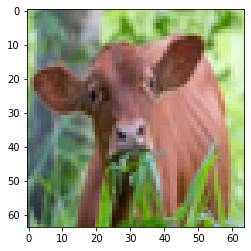

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[13]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(f"La probabilidad de que sea una naranja es de {pred[0]}")
#print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(X_test[13])

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

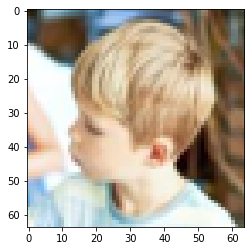

In [14]:
plt.imshow(X_test[4])

# tensorboard --logdir logs/


In [15]:
def inputs(imagen):
    a=resize_image(imagen,(64,64))
    a=np.asarray(a)
    a= a.astype('float32') / 255
    return a

In [65]:
a= inputs("../../../../Desktop/naranjo_naranja.png")
len(a)

64

La probabilidad de que sea una naranja es de 3.964280494983541e-07


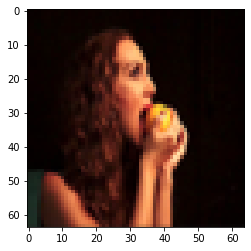

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(f"La probabilidad de que sea una naranja es de {pred[0]}")
plt.imshow(a)

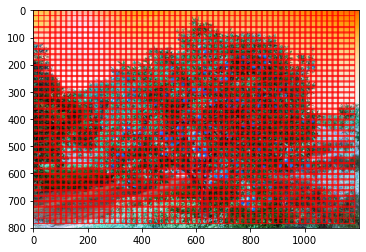

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

images_window=[]
# read the image and define the stepSize and window size 
# (width,height)
#image = cv2.imread("../../../../Desktop/naranjo.png") # your image path
image = cv2.imread("../../../../Desktop/arbol-de-naranja.jpg")#[...,::-1]
tmp = image # for drawing a rectangle
stepSize = 20
(w_width, w_height) = (64, 64) # window size
for x in range(0, image.shape[1] - w_width , stepSize):
    for y in range(0, image.shape[0] - w_height, stepSize):
        window = image[x:x + w_width, y:y + w_height, :]
        images_window.append(window)
        
# classify content of the window with your classifier and  
# determine if the window includes an object (cell) or not
      # draw window on image
        cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 2) # draw rectangle on image
        plt.imshow(np.array(tmp).astype('uint32'))
# show all windows
plt.show()

In [19]:
def sliding_window(image,w_shape,stepSize):
    w_width, w_height = w_shape # window size
    for x in range(0, image.shape[1] - w_width , stepSize):
        for y in range(0, image.shape[0] - w_height, stepSize):
            window = image[x:x + w_width, y:y + w_height, :]
            yield window

<ipython-input-20-fc2dba8056d1>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


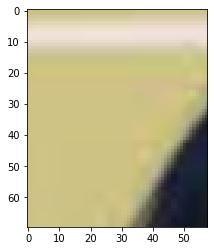

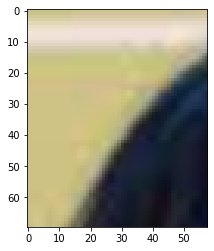

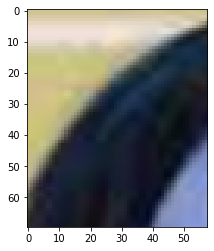

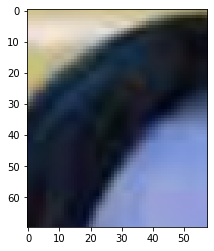

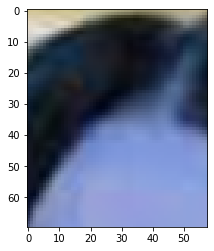

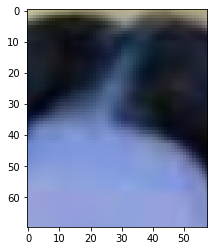

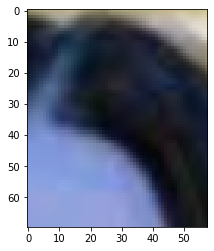

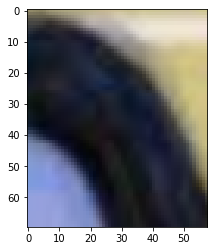

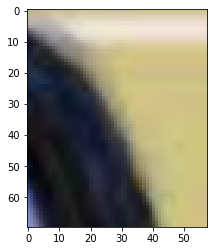

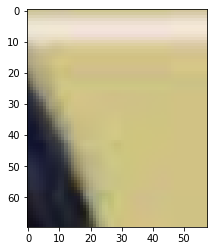

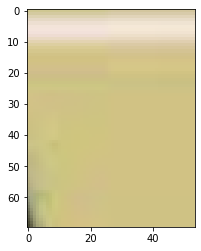

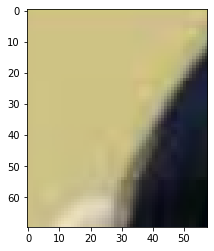

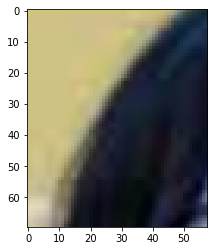

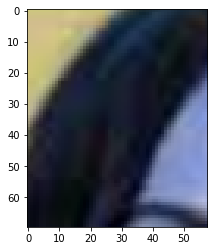

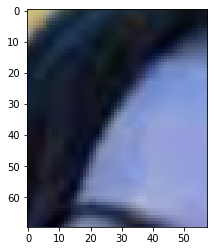

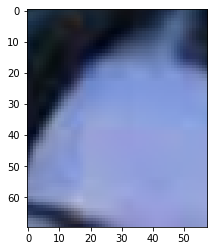

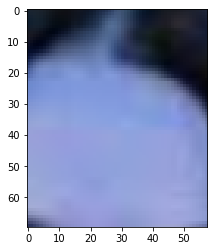

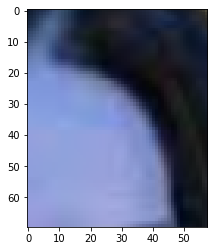

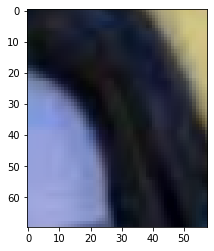

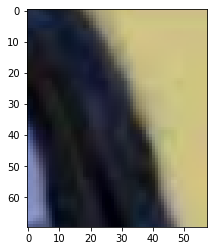

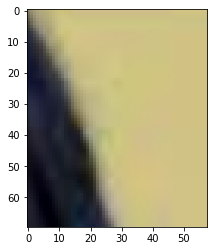

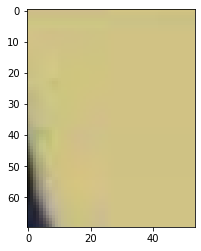

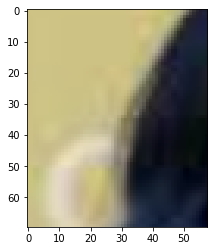

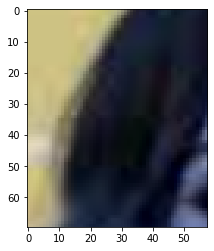

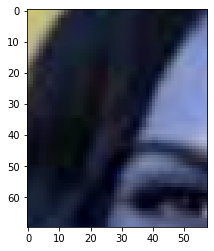

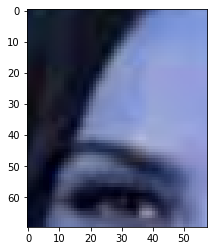

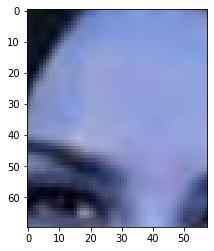

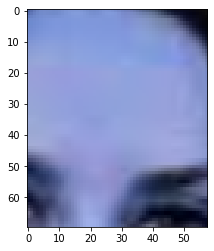

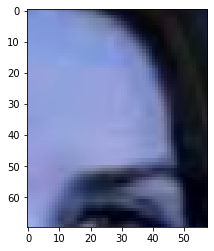

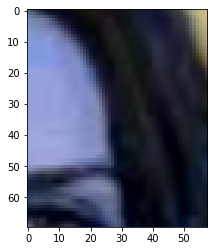

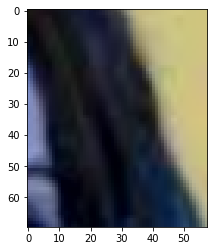

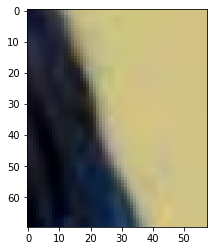

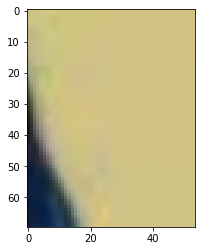

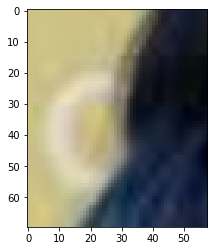

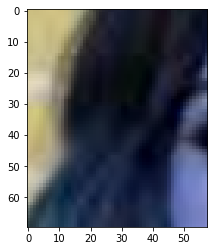

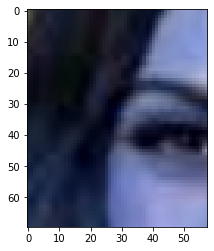

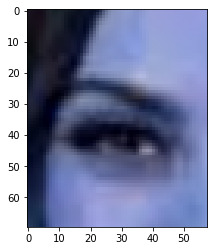

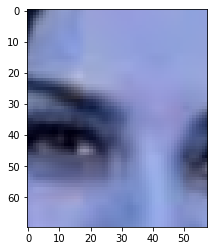

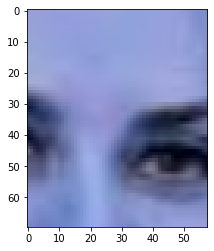

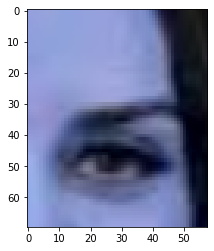

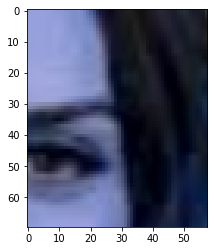

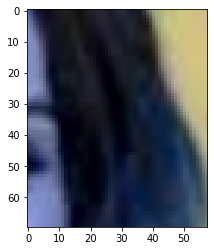

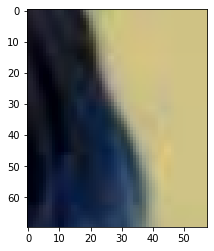

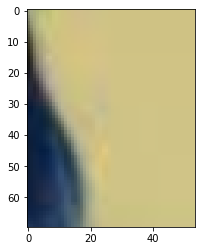

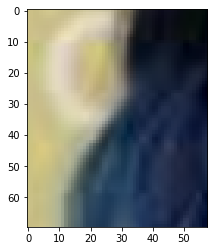

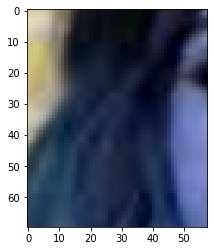

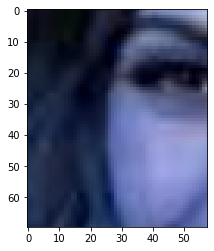

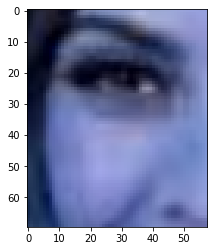

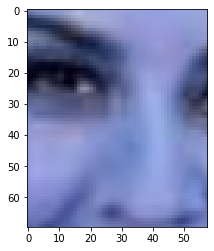

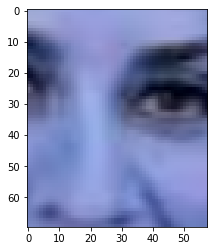

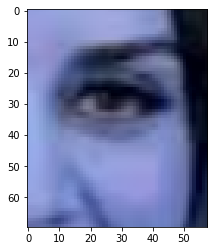

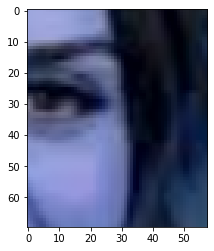

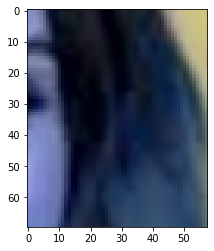

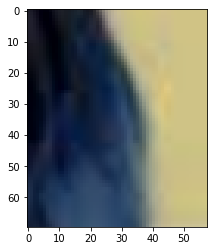

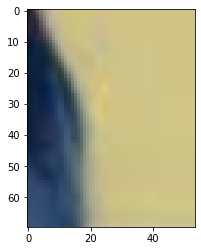

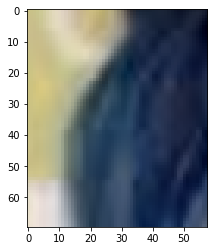

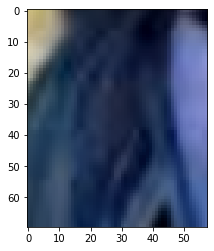

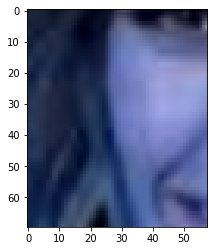

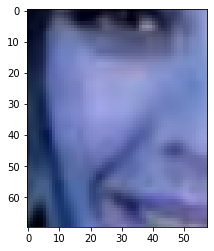

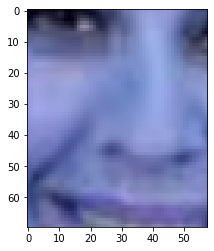

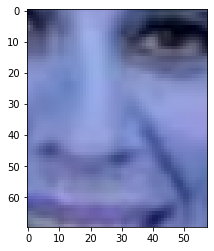

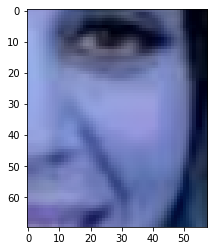

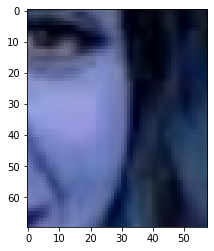

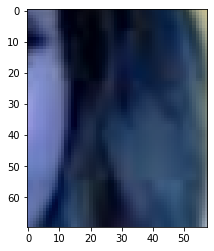

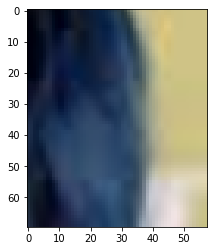

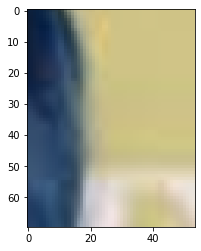

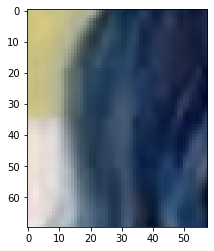

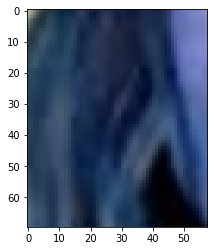

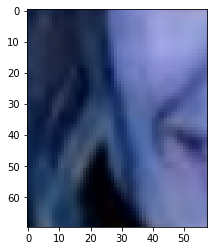

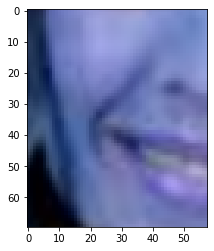

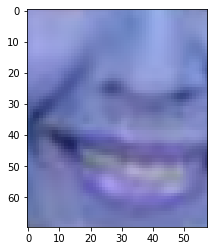

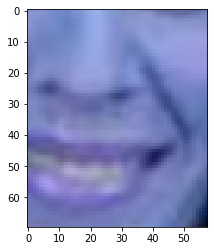

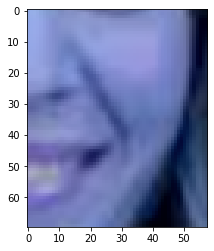

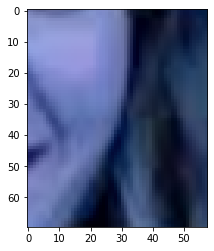

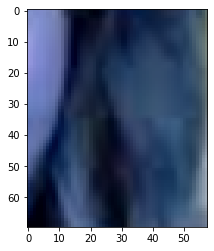

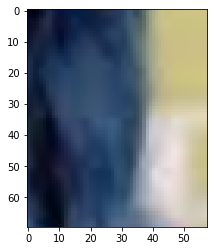

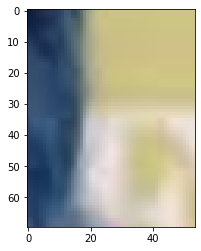

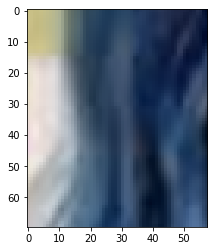

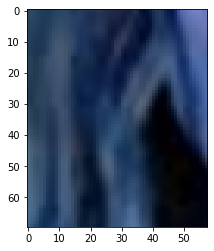

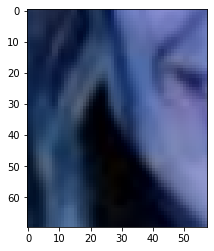

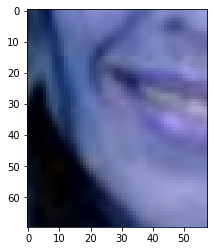

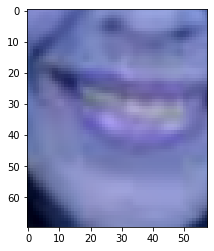

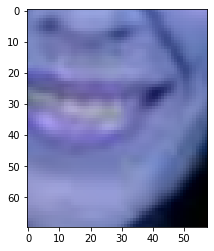

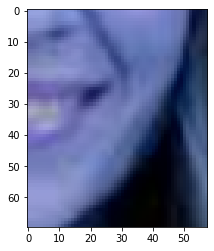

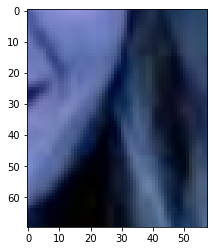

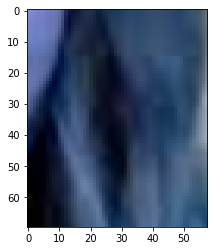

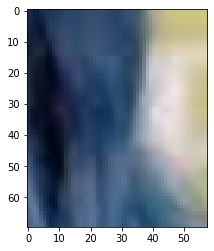

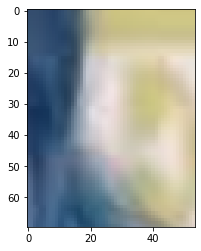

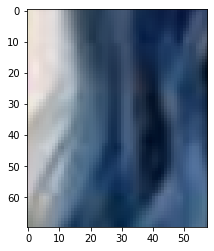

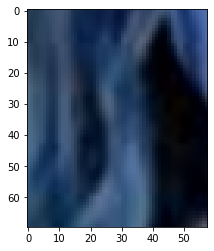

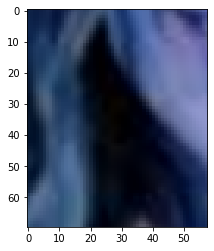

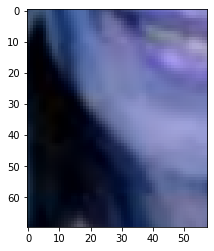

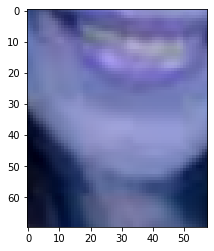

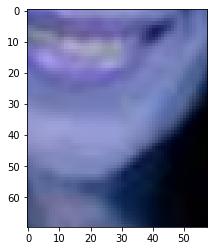

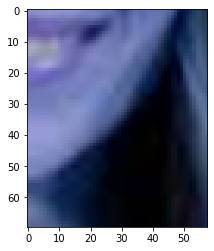

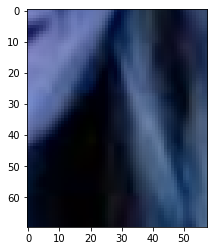

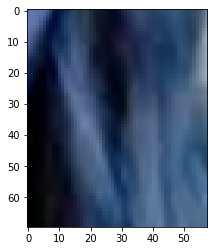

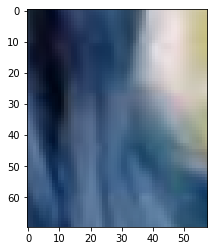

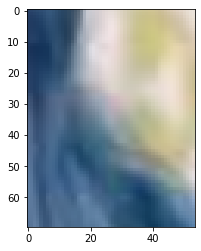

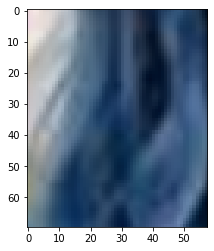

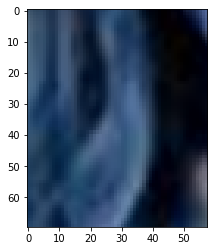

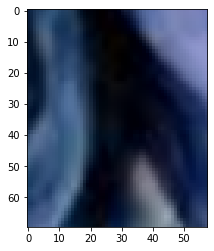

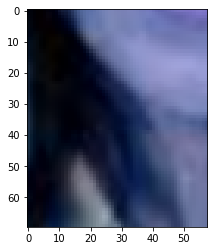

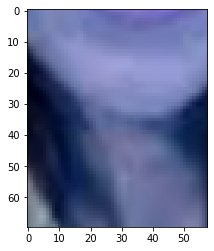

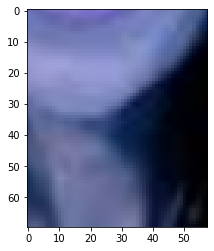

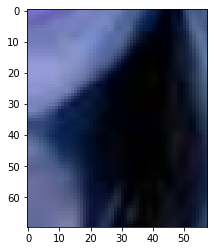

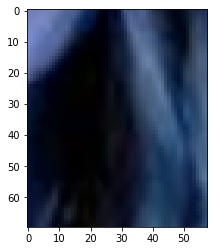

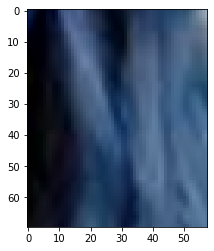

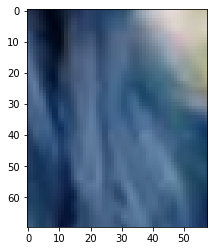

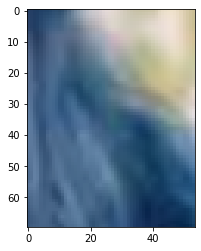

In [20]:
im = cv2.imread("../../../../Desktop/naranjo.png")

for i in sliding_window(im,(70,58),20):
    plt.figure()
    plt.imshow(i)

In [57]:
#im = Image.open("../../../../Desktop/arbol-de-naranja.jpg")
#im_break=[]
#for i in sliding_window(im,(40,40),20):
#    im_break.append(i)
#RGB_img = cv2.cvtColor("../../../../Desktop/arbol-de-naranja.jpg", cv2.COLOR_BGR2RGB)
img = cv2.imread("../../../../Desktop/arbol-de-naranja.jpg")[...,::-1]

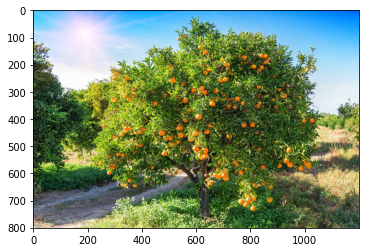

In [58]:
plt.imshow(img)

In [55]:
sliding_window(img,(40,40),20)

<generator object sliding_window at 0x7f8667e8ecf0>

In [51]:
img.shape

(801, 1200, 3)

In [52]:
prob_map=[]
for num,img in enumerate(sliding_window(img,(40,40),20)):
    try:    
        img = cv2.resize(img,(64,64))
        #img= img.resize((64,64))
        pred = model.predict(np.expand_dims(img,axis=0))[0]
        prob_map.append(pred)
        print(f"La probabilidad de que sea una naranja es de {pred[0]}")
        print("la imagen es",num)
    except:
        print("An exception occurred")
    

La probabilidad de que sea una naranja es de 0.0
la imagen es 0
La probabilidad de que sea una naranja es de 0.0
la imagen es 1
La probabilidad de que sea una naranja es de 0.0
la imagen es 2
La probabilidad de que sea una naranja es de 0.0
la imagen es 3
La probabilidad de que sea una naranja es de 0.0
la imagen es 4
La probabilidad de que sea una naranja es de 0.0
la imagen es 5
La probabilidad de que sea una naranja es de 0.0
la imagen es 6
La probabilidad de que sea una naranja es de 0.0
la imagen es 7
La probabilidad de que sea una naranja es de 0.0
la imagen es 8
La probabilidad de que sea una naranja es de 0.0
la imagen es 9
La probabilidad de que sea una naranja es de 0.0
la imagen es 10
La probabilidad de que sea una naranja es de 0.0
la imagen es 11
La probabilidad de que sea una naranja es de 0.0
la imagen es 12
La probabilidad de que sea una naranja es de 0.0
la imagen es 13
La probabilidad de que sea una naranja es de 0.0
la imagen es 14
La probabilidad de que sea una nara

La probabilidad de que sea una naranja es de 0.0
la imagen es 128
La probabilidad de que sea una naranja es de 0.0
la imagen es 129
La probabilidad de que sea una naranja es de 0.0
la imagen es 130
La probabilidad de que sea una naranja es de 0.0
la imagen es 131
La probabilidad de que sea una naranja es de 0.0
la imagen es 132
La probabilidad de que sea una naranja es de 0.0
la imagen es 133
La probabilidad de que sea una naranja es de 0.0
la imagen es 134
La probabilidad de que sea una naranja es de 0.0
la imagen es 135
La probabilidad de que sea una naranja es de 0.0
la imagen es 136
La probabilidad de que sea una naranja es de 0.0
la imagen es 137
La probabilidad de que sea una naranja es de 0.0
la imagen es 138
La probabilidad de que sea una naranja es de 0.0
la imagen es 139
La probabilidad de que sea una naranja es de 0.0
la imagen es 140
La probabilidad de que sea una naranja es de 0.0
la imagen es 141
La probabilidad de que sea una naranja es de 0.0
la imagen es 142
La probabi

La probabilidad de que sea una naranja es de 0.0
la imagen es 257
La probabilidad de que sea una naranja es de 0.0
la imagen es 258
La probabilidad de que sea una naranja es de 0.0
la imagen es 259
La probabilidad de que sea una naranja es de 0.0
la imagen es 260
La probabilidad de que sea una naranja es de 0.0
la imagen es 261
La probabilidad de que sea una naranja es de 0.0
la imagen es 262
La probabilidad de que sea una naranja es de 0.0
la imagen es 263
La probabilidad de que sea una naranja es de 1.0
la imagen es 264
La probabilidad de que sea una naranja es de 4.187820923373664e-11
la imagen es 265
La probabilidad de que sea una naranja es de 0.0
la imagen es 266
La probabilidad de que sea una naranja es de 0.0
la imagen es 267
La probabilidad de que sea una naranja es de 0.0
la imagen es 268
La probabilidad de que sea una naranja es de 0.0
la imagen es 269
La probabilidad de que sea una naranja es de 0.0
la imagen es 270
La probabilidad de que sea una naranja es de 0.0
la imagen

La probabilidad de que sea una naranja es de 1.0
la imagen es 385
La probabilidad de que sea una naranja es de 1.0
la imagen es 386
La probabilidad de que sea una naranja es de 0.0
la imagen es 387
La probabilidad de que sea una naranja es de 0.0
la imagen es 388
La probabilidad de que sea una naranja es de 1.6149652330579963e-29
la imagen es 389
La probabilidad de que sea una naranja es de 0.0
la imagen es 390
La probabilidad de que sea una naranja es de 0.0
la imagen es 391
La probabilidad de que sea una naranja es de 0.0
la imagen es 392
La probabilidad de que sea una naranja es de 0.0
la imagen es 393
La probabilidad de que sea una naranja es de 0.0
la imagen es 394
La probabilidad de que sea una naranja es de 0.0
la imagen es 395
La probabilidad de que sea una naranja es de 0.0
la imagen es 396
La probabilidad de que sea una naranja es de 0.0
la imagen es 397
La probabilidad de que sea una naranja es de 0.0
la imagen es 398
La probabilidad de que sea una naranja es de 0.0
la image

La probabilidad de que sea una naranja es de 1.2230641433639062e-29
la imagen es 510
La probabilidad de que sea una naranja es de 0.0
la imagen es 511
La probabilidad de que sea una naranja es de 0.0
la imagen es 512
La probabilidad de que sea una naranja es de 0.0
la imagen es 513
La probabilidad de que sea una naranja es de 0.0
la imagen es 514
La probabilidad de que sea una naranja es de 0.0
la imagen es 515
La probabilidad de que sea una naranja es de 0.0
la imagen es 516
La probabilidad de que sea una naranja es de 0.0
la imagen es 517
La probabilidad de que sea una naranja es de 0.0
la imagen es 518
La probabilidad de que sea una naranja es de 0.0
la imagen es 519
La probabilidad de que sea una naranja es de 0.0
la imagen es 520
La probabilidad de que sea una naranja es de 0.0
la imagen es 521
La probabilidad de que sea una naranja es de 0.0
la imagen es 522
La probabilidad de que sea una naranja es de 0.0
la imagen es 523
La probabilidad de que sea una naranja es de 0.0
la image

La probabilidad de que sea una naranja es de 0.0
la imagen es 637
La probabilidad de que sea una naranja es de 0.0
la imagen es 638
La probabilidad de que sea una naranja es de 0.0
la imagen es 639
La probabilidad de que sea una naranja es de 0.0
la imagen es 640
La probabilidad de que sea una naranja es de 0.0
la imagen es 641
La probabilidad de que sea una naranja es de 0.0
la imagen es 642
La probabilidad de que sea una naranja es de 0.0
la imagen es 643
La probabilidad de que sea una naranja es de 0.0
la imagen es 644
La probabilidad de que sea una naranja es de 1.0
la imagen es 645
La probabilidad de que sea una naranja es de 1.0
la imagen es 646
La probabilidad de que sea una naranja es de 0.0
la imagen es 647
La probabilidad de que sea una naranja es de 0.0
la imagen es 648
La probabilidad de que sea una naranja es de 0.0
la imagen es 649
La probabilidad de que sea una naranja es de 0.0
la imagen es 650
La probabilidad de que sea una naranja es de 1.0
la imagen es 651
La probabi

La probabilidad de que sea una naranja es de 0.0
la imagen es 766
La probabilidad de que sea una naranja es de 0.0
la imagen es 767
La probabilidad de que sea una naranja es de 1.0
la imagen es 768
La probabilidad de que sea una naranja es de 0.0
la imagen es 769
La probabilidad de que sea una naranja es de 0.0
la imagen es 770
La probabilidad de que sea una naranja es de 1.0
la imagen es 771
La probabilidad de que sea una naranja es de 0.0
la imagen es 772
La probabilidad de que sea una naranja es de 0.0
la imagen es 773
La probabilidad de que sea una naranja es de 0.0
la imagen es 774
La probabilidad de que sea una naranja es de 0.0
la imagen es 775
La probabilidad de que sea una naranja es de 0.0
la imagen es 776
La probabilidad de que sea una naranja es de 0.0
la imagen es 777
La probabilidad de que sea una naranja es de 0.0
la imagen es 778
La probabilidad de que sea una naranja es de 0.0
la imagen es 779
La probabilidad de que sea una naranja es de 0.0
la imagen es 780
La probabi

La probabilidad de que sea una naranja es de 1.0
la imagen es 894
La probabilidad de que sea una naranja es de 0.0
la imagen es 895
La probabilidad de que sea una naranja es de 0.0
la imagen es 896
La probabilidad de que sea una naranja es de 0.0
la imagen es 897
La probabilidad de que sea una naranja es de 0.0
la imagen es 898
La probabilidad de que sea una naranja es de 0.0
la imagen es 899
La probabilidad de que sea una naranja es de 0.0
la imagen es 900
La probabilidad de que sea una naranja es de 0.0
la imagen es 901
La probabilidad de que sea una naranja es de 0.0
la imagen es 902
La probabilidad de que sea una naranja es de 0.0
la imagen es 903
La probabilidad de que sea una naranja es de 0.0
la imagen es 904
La probabilidad de que sea una naranja es de 0.0
la imagen es 905
La probabilidad de que sea una naranja es de 0.0
la imagen es 906
La probabilidad de que sea una naranja es de 0.0
la imagen es 907
La probabilidad de que sea una naranja es de 0.0
la imagen es 908
La probabi

La probabilidad de que sea una naranja es de 0.0
la imagen es 1019
La probabilidad de que sea una naranja es de 0.0
la imagen es 1020
La probabilidad de que sea una naranja es de 0.0
la imagen es 1021
La probabilidad de que sea una naranja es de 0.0
la imagen es 1022
La probabilidad de que sea una naranja es de 0.0
la imagen es 1023
La probabilidad de que sea una naranja es de 0.0
la imagen es 1024
La probabilidad de que sea una naranja es de 0.0
la imagen es 1025
La probabilidad de que sea una naranja es de 0.0
la imagen es 1026
La probabilidad de que sea una naranja es de 1.0
la imagen es 1027
La probabilidad de que sea una naranja es de 0.0
la imagen es 1028
La probabilidad de que sea una naranja es de 0.0
la imagen es 1029
La probabilidad de que sea una naranja es de 0.0
la imagen es 1030
La probabilidad de que sea una naranja es de 0.0
la imagen es 1031
La probabilidad de que sea una naranja es de 0.0
la imagen es 1032
La probabilidad de que sea una naranja es de 0.0
la imagen es 

La probabilidad de que sea una naranja es de 0.0
la imagen es 1147
La probabilidad de que sea una naranja es de 1.69124321471038e-36
la imagen es 1148
La probabilidad de que sea una naranja es de 0.0
la imagen es 1149
La probabilidad de que sea una naranja es de 0.0
la imagen es 1150
La probabilidad de que sea una naranja es de 0.0
la imagen es 1151
La probabilidad de que sea una naranja es de 0.0
la imagen es 1152
La probabilidad de que sea una naranja es de 0.0
la imagen es 1153
La probabilidad de que sea una naranja es de 0.0
la imagen es 1154
La probabilidad de que sea una naranja es de 0.0
la imagen es 1155
La probabilidad de que sea una naranja es de 0.0
la imagen es 1156
La probabilidad de que sea una naranja es de 0.0
la imagen es 1157
La probabilidad de que sea una naranja es de 0.0
la imagen es 1158
La probabilidad de que sea una naranja es de 0.0
la imagen es 1159
La probabilidad de que sea una naranja es de 0.0
la imagen es 1160
La probabilidad de que sea una naranja es de 

La probabilidad de que sea una naranja es de 0.0
la imagen es 1272
La probabilidad de que sea una naranja es de 0.0
la imagen es 1273
La probabilidad de que sea una naranja es de 0.0
la imagen es 1274
La probabilidad de que sea una naranja es de 0.0
la imagen es 1275
La probabilidad de que sea una naranja es de 0.0
la imagen es 1276
La probabilidad de que sea una naranja es de 0.0
la imagen es 1277
La probabilidad de que sea una naranja es de 0.0
la imagen es 1278
La probabilidad de que sea una naranja es de 0.0
la imagen es 1279
La probabilidad de que sea una naranja es de 0.0
la imagen es 1280
La probabilidad de que sea una naranja es de 0.0
la imagen es 1281
La probabilidad de que sea una naranja es de 0.0
la imagen es 1282
La probabilidad de que sea una naranja es de 0.0
la imagen es 1283
La probabilidad de que sea una naranja es de 0.0
la imagen es 1284
La probabilidad de que sea una naranja es de 0.0
la imagen es 1285
La probabilidad de que sea una naranja es de 0.0
la imagen es 

La probabilidad de que sea una naranja es de 0.0
la imagen es 1400
La probabilidad de que sea una naranja es de 0.0
la imagen es 1401
La probabilidad de que sea una naranja es de 0.0
la imagen es 1402
La probabilidad de que sea una naranja es de 0.0
la imagen es 1403
La probabilidad de que sea una naranja es de 0.0
la imagen es 1404
La probabilidad de que sea una naranja es de 0.0
la imagen es 1405
La probabilidad de que sea una naranja es de 0.0
la imagen es 1406
La probabilidad de que sea una naranja es de 0.0
la imagen es 1407
La probabilidad de que sea una naranja es de 0.0
la imagen es 1408
La probabilidad de que sea una naranja es de 0.0
la imagen es 1409
La probabilidad de que sea una naranja es de 0.0
la imagen es 1410
La probabilidad de que sea una naranja es de 0.0
la imagen es 1411
La probabilidad de que sea una naranja es de 0.0
la imagen es 1412
La probabilidad de que sea una naranja es de 0.0
la imagen es 1413
La probabilidad de que sea una naranja es de 0.0
la imagen es 

La probabilidad de que sea una naranja es de 0.0
la imagen es 1523
La probabilidad de que sea una naranja es de 0.0
la imagen es 1524
La probabilidad de que sea una naranja es de 0.0
la imagen es 1525
La probabilidad de que sea una naranja es de 0.0
la imagen es 1526
La probabilidad de que sea una naranja es de 0.0
la imagen es 1527
La probabilidad de que sea una naranja es de 0.0
la imagen es 1528
La probabilidad de que sea una naranja es de 0.0
la imagen es 1529
La probabilidad de que sea una naranja es de 0.0
la imagen es 1530
La probabilidad de que sea una naranja es de 0.0
la imagen es 1531
La probabilidad de que sea una naranja es de 0.0
la imagen es 1532
La probabilidad de que sea una naranja es de 0.0
la imagen es 1533
La probabilidad de que sea una naranja es de 0.0
la imagen es 1534
La probabilidad de que sea una naranja es de 0.0
la imagen es 1535
La probabilidad de que sea una naranja es de 0.0
la imagen es 1536
La probabilidad de que sea una naranja es de 0.0
la imagen es 

An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An excepti

In [ ]:
import seaborn as sns

In [ ]:
dim=(np.array(img.shape)//40)
dim
prob_map=np.array(prob_map).reshape(15,28)

In [ ]:
sns.heatmap(prob_map)

In [ ]:
map(enumerate(sliding_window(im,(40,40),40)))

In [ ]:
im